In [714]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [715]:
#Read the dataset
netflix= pd.read_csv('Leadzai_DS_r&s_Exercise01_netflix.csv')

#View the first 5 rows of the dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [716]:
# Explore the dataset - print out the number of rows and columns
num_rows = netflix.shape[0]
num_columns = netflix.shape[1]

print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)

Number of rows:  8807
Number of columns:  12


In [717]:
# Explore the dataset - information about columns and data type
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [718]:
#Explore the dataset - check for duplicates
print("Number of duplicates: ", netflix.duplicated().sum())

Number of duplicates:  0


In [719]:
# Explore the dataset - summary statistics
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Analysis 
- **Count**: There are 8,807 data points in the 'release_year' column, meaning there are 8,807 movies or series in the dataset with information about their release years.

- **Mean**: The mean (average) release year is, on average, around 2014.

- **Standard Deviation (std)**: The standard deviation is approximately 8.82. 

- **Minimum (min)**: The earliest release year in the dataset is 1925. This indicates that the dataset contains content that dates back to that year.

- **25th Percentile (Q1)**: 25% of the data falls below the year 2013. This provides a lower bound on the middle 50% of the data.

- **Median (50th Percentile, Q2)**: The median release year is 2017. This is the year that divides the dataset into two equal halves. It's often used as a measure of central tendency.

- **75th Percentile (Q3)**: 75% of the data falls below the year 2019. This provides an upper bound on the middle 50% of the data.

- **Maximum (max)**: The most recent release in the dataset is 2021. 

In [720]:
# Explore the dataset - check for missing values
missing_values = netflix.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [721]:
# Percentage of null values in each column
null_percentage= round(missing_values/len(netflix)*100,2)
null_percentage_sort =null_percentage.sort_values(ascending=False)
null_percentage_sort

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

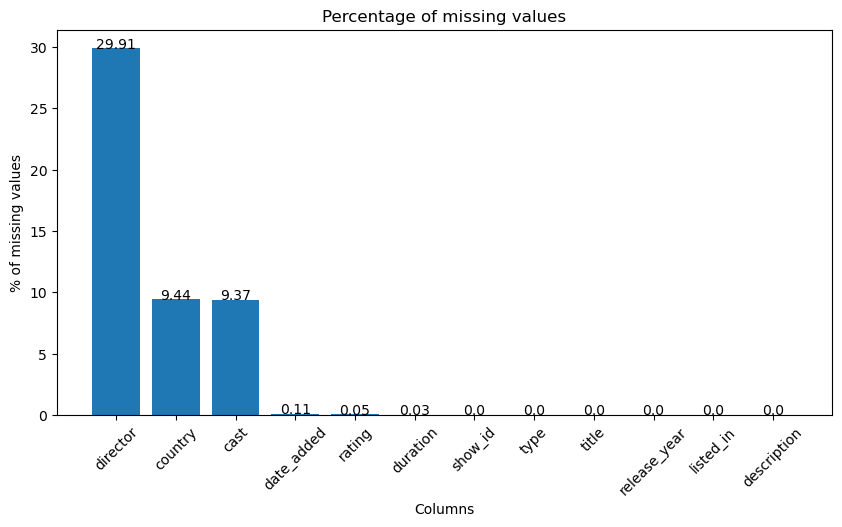

In [722]:
# Percentage of missing values - visualization
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', color = 'black')
        
if __name__ == "__main__":
    x = null_percentage_sort.index
    y = null_percentage_sort.values
    plt.figure(figsize=(10,5))
    plt.bar(x,y)
    add_labels(x,y)
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('% of missing values')
    plt.title('Percentage of missing values')
    plt.show()

In [723]:
# Check the null values in date_added column
netflix[netflix.date_added.isnull()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."


In [724]:
# Tranform the date_added column to datetime format
netflix['date_added'] = pd.to_datetime(netflix['date_added'],format='mixed') 

In [725]:
""" We have 98 null values in date_added column (0.11%), we can input them manually or substitute them with
the most recent date. In this case, we substitute the null values with the most recent date"""

# Find the most recent date
netflix_recent_date = netflix['date_added'].max() 

# Replace the null values with the most recent date
netflix.fillna({'date_added': netflix_recent_date}, inplace=True)

In [726]:
# Add a column with the year of addition and another with the month
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

In [727]:
netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
rating             4
duration           3
show_id            0
type               0
title              0
date_added         0
release_year       0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

In [728]:
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object

In [729]:
#Check the null values in "rating" column
netflix[netflix.rating.isnull()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017,1
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016,12
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018,2
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017,3


In [730]:
# Now we can deal with the null values in "director", "country" and "cast" columns
# Country column - fill with mode
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

# For 'director', 'country', 'cast' and 'rating' columns - we fill with "No information"
netflix.fillna({'director':'No information', 'country':'No information', 'cast':'No information', 'rating':'No information'}, inplace=True)


# Check if there are still null values
netflix.isnull().sum().sort_values(ascending=False)



duration        3
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [731]:
# Check the null values in "duration" column
netflix[netflix.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8


- All rows where this information is missing are of type "movie" 
- All movies are from the same director - Louis C.K.
- "rating" column has information about movie "duration"

* We can move the information and then fill the "rating" column with "No Information" as we did before

In [732]:
# Move the miss place information in "rating" column to "duration" column - loc in "Louis C.K." 
netflix.loc[netflix['director']=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8


In [733]:
netflix.loc[netflix['director']=='Louis C.K.', 'duration'] = netflix['rating']
netflix.loc[netflix['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,8


In [734]:
netflix.loc[netflix['director']=='Louis C.K.', 'rating'] = 'No information'
netflix.loc[netflix['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,No information,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,No information,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,No information,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,8


In [735]:
netflix.isnull().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [736]:
pickle.dump(netflix, open('netflix_final.pkl', 'wb'))

----

In [737]:
netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

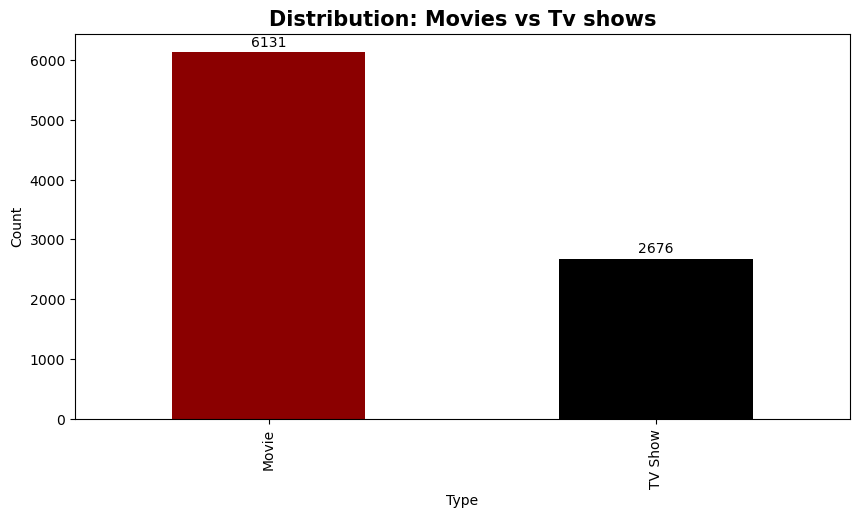

In [738]:
# Visualization of the distribution of the type column
        
x = netflix['type'].value_counts().index
y = netflix['type'].value_counts().values

fonts= {'fontsize':15, 'fontweight':'bold', 'color':'black'}
colors = ['darkred', 'k']

ax = netflix_type.plot(kind='bar', color=colors, figsize=(10,5))
plt.title('Distribution: Movies vs Tv shows', fonts)
plt.xlabel('Type')
plt.ylabel('Count')
    
for i, v in enumerate(netflix_type):
    ax.text(i, v + 100 , str(v), ha='center')
    
plt.show()

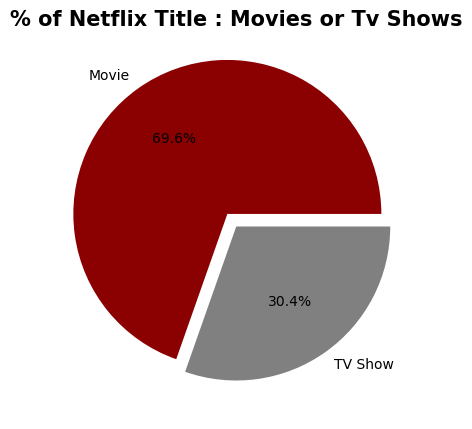

In [739]:
plt.figure(figsize=(9,5))
plt.title('% of Netflix Title : Movies or Tv Shows', fonts)
plt.pie(netflix.type.value_counts(), explode= (0.1, 0), labels=netflix.type.value_counts().index,
        colors= ['darkred', 'grey'], autopct='%1.1f%%')
plt.show()


### Analysis 
- We can see that there are more Movies than TV shows in this Netflix dataset

In [740]:
# Year in which Movie or TV show was added to Netflix  
year_netflix= netflix['year_added'].value_counts()
year_netflix

year_added
2019    2016
2020    1879
2018    1649
2021    1508
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


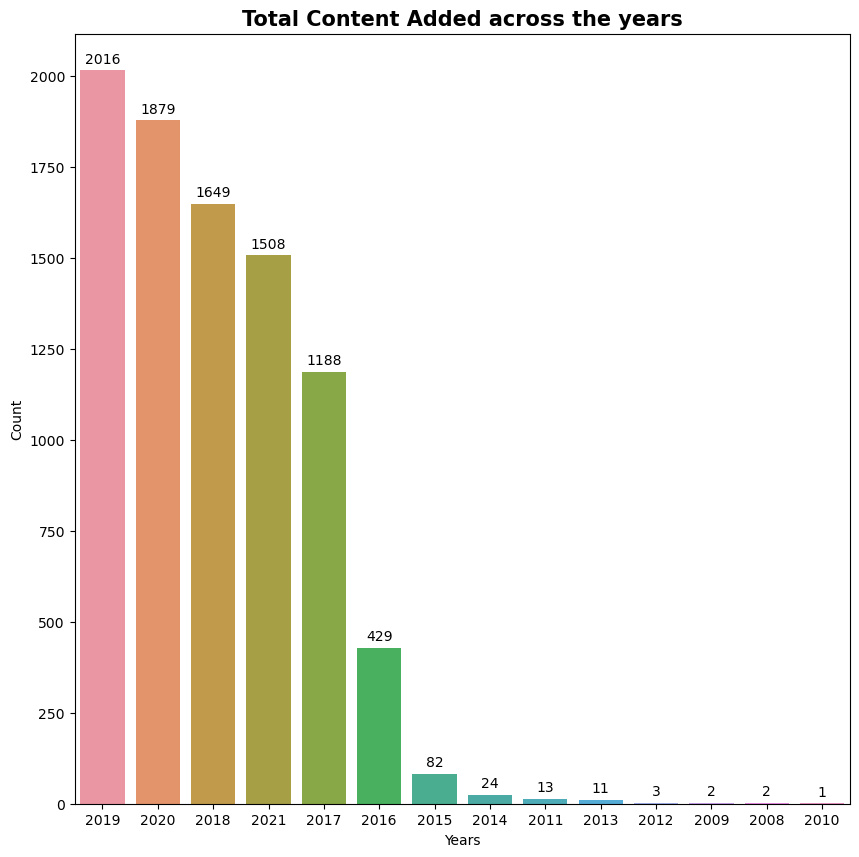

In [741]:
fonts= {'fontsize':15, 'fontweight':'bold', 'color':'black'}

plt.figure(figsize=(10,10))
plt.title('Total Content Added across the years', fonts)

sns.countplot(x='year_added', data=netflix, order=year_netflix.index)
plt.xlabel('Years')
plt.ylabel('Count')

for i, v in enumerate(year_netflix):
    plt.text(i, v + 20 , str(v), ha='center')

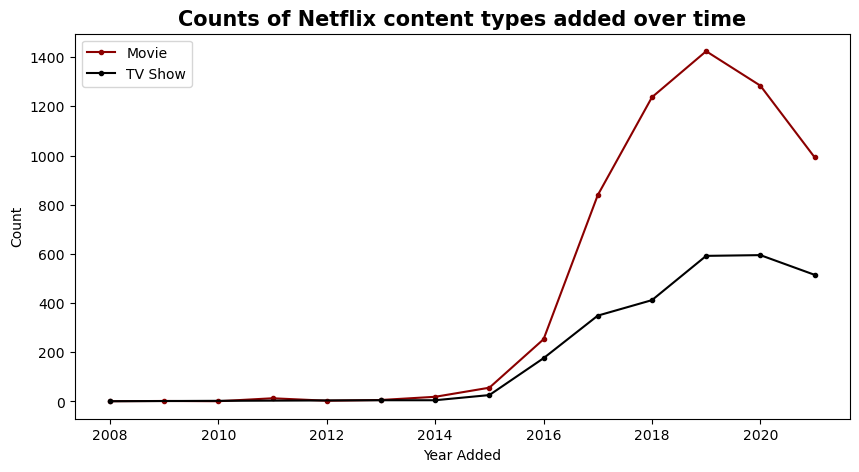

In [742]:
# Checking TV Shows and movies added across the years

year_type = (netflix.groupby(['type', 'year_added'])['title'].size().reset_index())

# Custom color 
custom_colors = {'Movie': 'darkred', 'TV Show': 'k'}

# Create the figure and set the figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Create a line plot for 'Movie'
movie_data = year_type[year_type['type'] == 'Movie']
ax.plot(movie_data['year_added'], movie_data['title'], label='Movie', color=custom_colors['Movie'], marker='.')

# Create a line plot for 'TV Show'
tv_show_data = year_type[year_type['type'] == 'TV Show']
ax.plot(tv_show_data['year_added'], tv_show_data['title'], label='TV Show', color=custom_colors['TV Show'], marker='.')

# Set plot labels and title
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.title("Counts of Netflix content types added over time", fonts)

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Analysis 
- The amount of content added to Netflix has, significantly increased since 2016
- The number of films is significantly greater than the number of TV show
- In 2019, we observed the highest volume of added content, which may be attributed to the impact of COVID-19.

In [743]:
# Checking months in which Movie or TV show was added to Netflix
netflix['month_added'].value_counts()


month_added
7     827
12    813
9     780
4     764
10    760
8     755
3     742
1     738
6     728
11    705
5     632
2     563
Name: count, dtype: int64

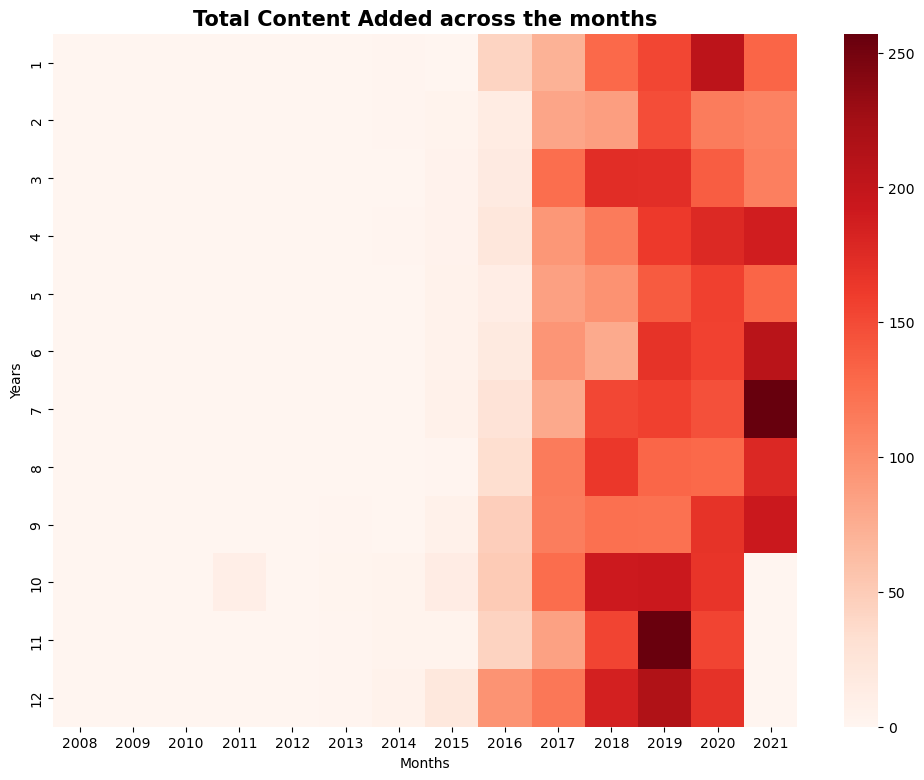

In [744]:
month_netflix = netflix.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(12,9))

sns.heatmap(month_netflix, cmap='Reds')
plt.title('Total Content Added across the months', fonts)
plt.xlabel('Months')
plt.ylabel('Years')
plt.show()

### Analysis
- The above heatmap shows that Netflix began to increase its content around 2014. Over the following years, the streaming platform continued to increase the amount of content, with the most recent months in this dataset showing consistently high content additions.

In [745]:
# Checking the top countries where content are produced
top15_country = netflix['country'].value_counts().sort_values(ascending=False).head(10)
top15_country

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


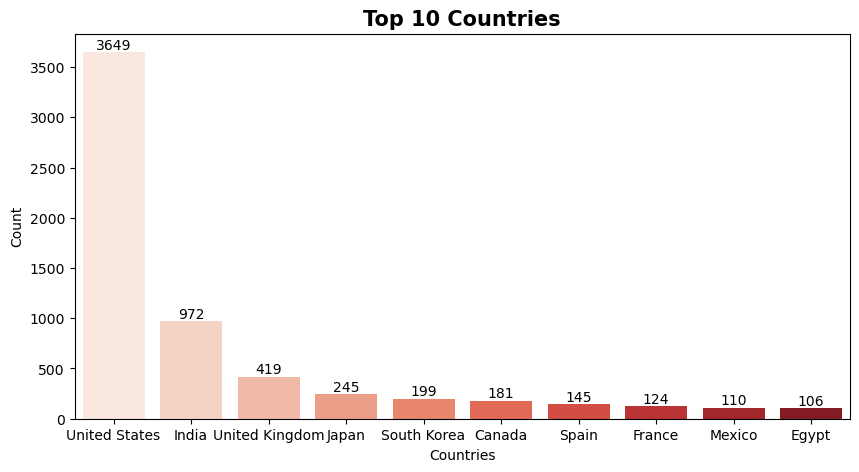

In [746]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Countries', fonts)
sns.barplot(x=top15_country.index, y=top15_country.values, palette='Reds')
plt.xlabel('Countries')
plt.ylabel('Count')

for index, value in enumerate(top15_country):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [747]:
netflix['country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


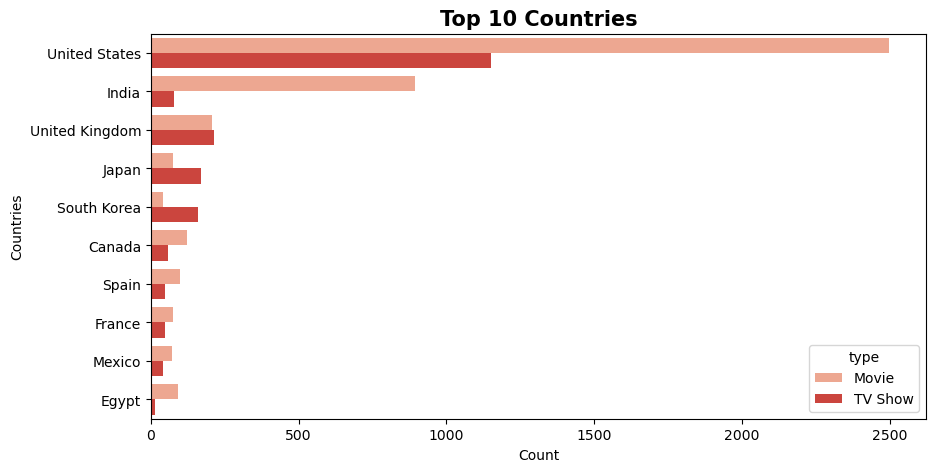

In [748]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = netflix, y='country', order=netflix['country'].value_counts().index[:10],
              hue= 'type', palette='Reds')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('Top 10 Countries', fonts)
plt.show()

In [749]:
# Checking the top directors of Netflix content
top15_director = netflix[netflix.director != 'No information'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top15_director

title
Dick Johnson Is Dead                Kirsten Johnson
Ganglands                           Julien Leclercq
Midnight Mass                         Mike Flanagan
My Little Pony: A New Generation      Robert Cullen
My Little Pony: A New Generation     José Luis Ucha
                                         ...       
Zinzana                             Majid Al Ansari
Zodiac                                David Fincher
Zombieland                          Ruben Fleischer
Zoom                                   Peter Hewitt
Zubaan                                  Mozez Singh
Length: 6978, dtype: object

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


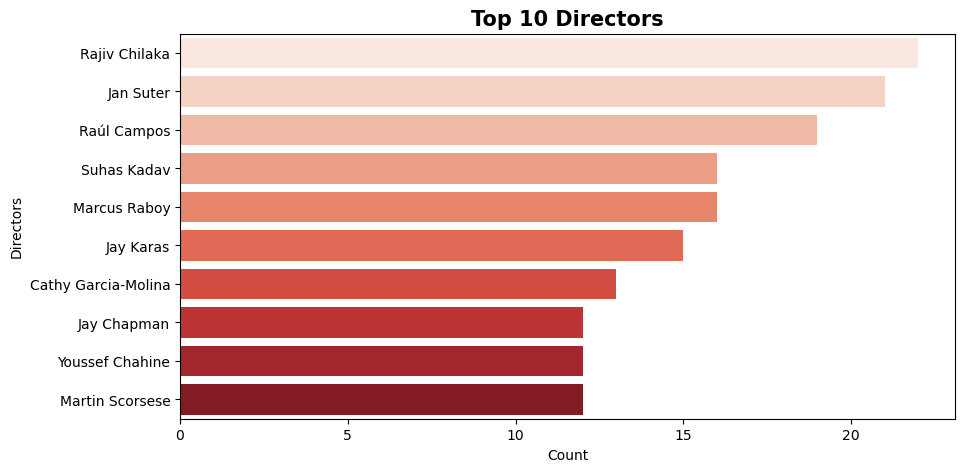

In [750]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Directors', fonts)
sns.countplot(y= top15_director, order=top15_director.value_counts().index[:10], palette='Reds')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

In [751]:
#Checking top genres of Netflix content
netflix['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [752]:
#Split the informatio to retain only the genre
filtred_description = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtred_description

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Ganglands                         Crime TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 19323, dtype: object

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


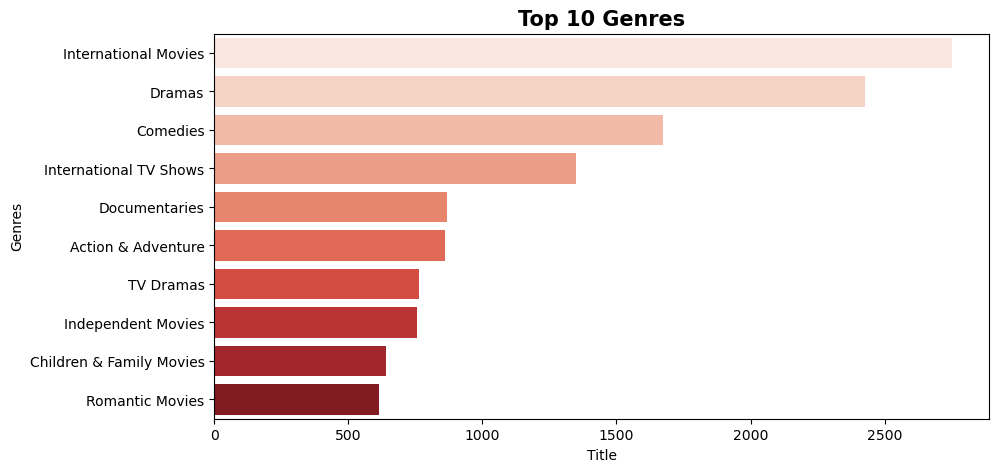

In [753]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Genres', fonts)
sns.countplot(y= filtred_description, order=filtred_description.value_counts().index[:10], palette='Reds')
plt.xlabel('Title')
plt.ylabel('Genres')
plt.show()

In [754]:
# Maturity Rating of Netflix content

# Legend - Little (All)): G, TV-Y, TV-G
#          Older Kids (7+): PG, TV-Y7, TV-Y7-FV, TV-PG
#          Teens(13+): PG-13
#          Young Adults (16+): TV-14
#          Adults (18+): NR, R, NC-17, TV-MA, UR

netflix['rating'].value_counts()

rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
No information       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: count, dtype: int64

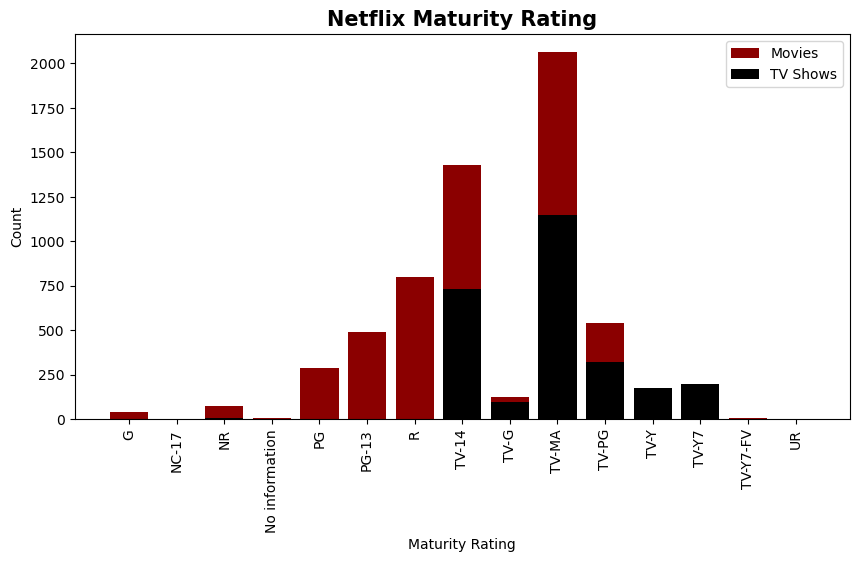

In [755]:
#Create a plot bar chart to show the comparison of the maturity rating of Netflix content by movies and TV Shows
order = netflix.rating.unique()
movies= netflix['type']=='Movie'
shows= netflix['type']=='TV Show'

movies_count = netflix[movies].groupby('rating')['title'].count().reset_index()
shows_count = netflix[shows].groupby('rating')['title'].count().reset_index()

shows_count.sort_values(by='rating', ascending=True)
plt.figure(figsize=(10,5))
plt.title('Netflix Maturity Rating', fonts)
plt.bar(movies_count.rating, movies_count.title, color='darkred')
plt.bar(shows_count.rating, shows_count.title, color='k')

plt.xticks(rotation=90)
plt.legend(['Movies', 'TV Shows'])
plt.xlabel('Maturity Rating')
plt.ylabel('Count')
plt.show()



### Analysis 
- The majority of content available on Netflix is classified as TV-MA, a rating designated for movies and TV shows intended for adult audiences (+18).

In [756]:
# Top 10 TV shows Actors on Netlflix 
tv_show= netflix[netflix['type']=='TV Show']
movie= netflix[netflix['type']=='Movie']
tv_show_cast= tv_show[tv_show.cast != 'No information'].set_index('title').cast.str.split(", ", expand=True).stack().reset_index(level=1, drop=True)


c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Count')

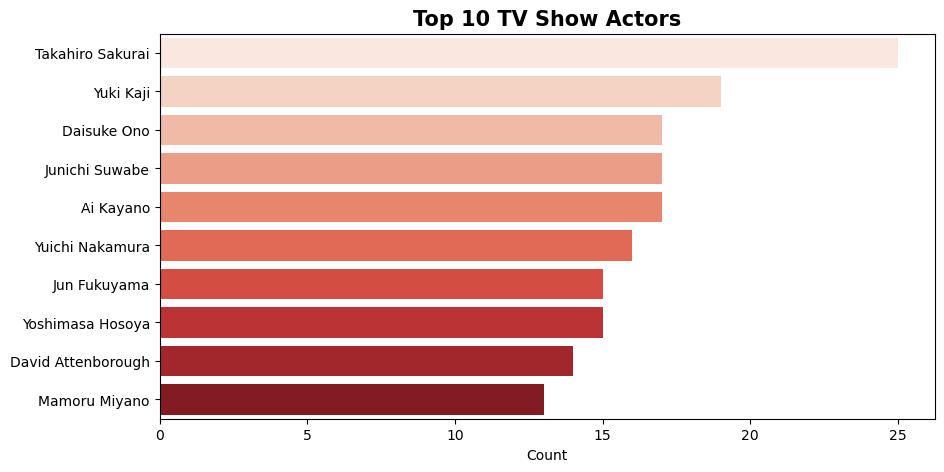

In [757]:
plt.figure(figsize=(10,5))
sns.countplot(y= tv_show_cast, order=tv_show_cast.value_counts().index[:10], palette='Reds')
plt.title('Top 10 TV Show Actors', fonts)
plt.xlabel('Count')

- Top actor on Netflix Tv shows is Takahiro Sakurai

In [758]:
movies_cast= movie[movie.cast != 'No information'].set_index('title').cast.str.split(", ", expand=True).stack().reset_index(level=1, drop=True)
movies_cast.value_counts()

Anupam Kher              42
Shah Rukh Khan           35
Naseeruddin Shah         32
Akshay Kumar             30
Om Puri                  30
                         ..
Sushma Bakshi             1
Yusuf Hussain             1
Amarjeet Amle             1
Priya                     1
Chittaranjan Tripathy     1
Name: count, Length: 25951, dtype: int64

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


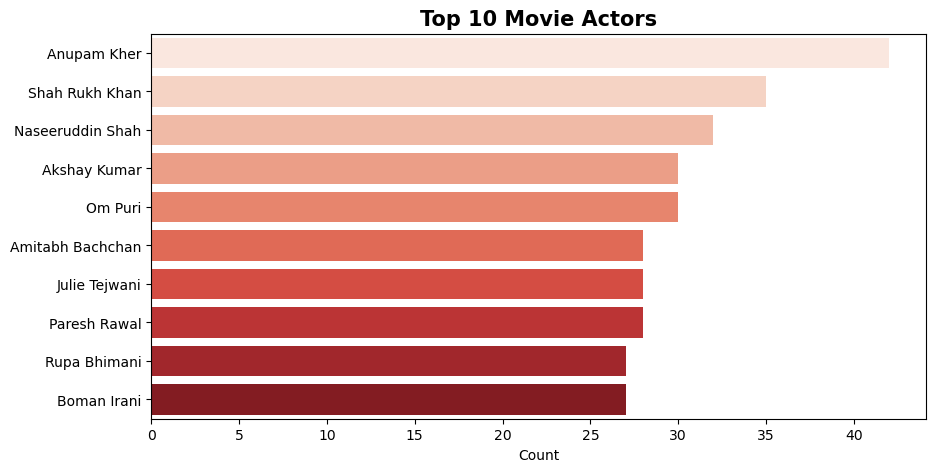

In [759]:
plt.figure(figsize=(10,5))
sns.countplot(y= movies_cast, order=movies_cast.value_counts().index[:10], palette='Reds')
plt.title('Top 10 Movie Actors', fonts)
plt.xlabel('Count')
plt.show()

- Top actor on Netflix Movies is Anupam Kher

In [760]:
# Movie duration on Netflix
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No information,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [761]:
movie['duration']=movie['duration'].str.replace(' min', '').astype(int)

C:\Users\analm\AppData\Local\Temp\ipykernel_30348\4236800402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration']=movie['duration'].str.replace(' min', '').astype(int)


In [762]:
movie.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int32
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object

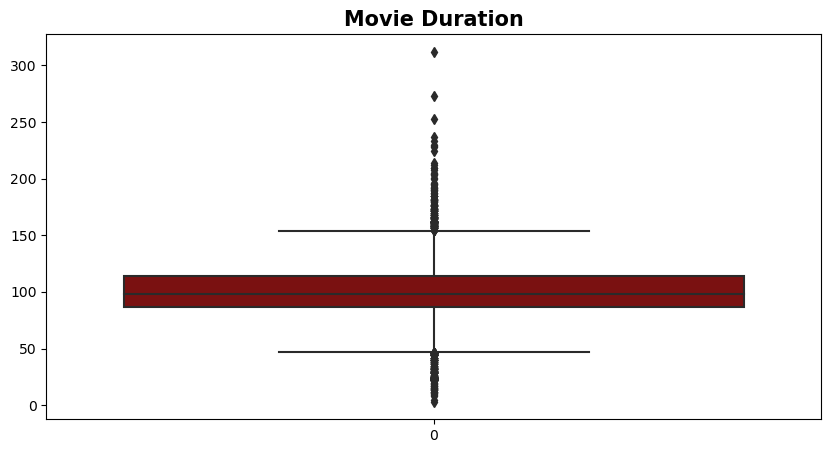

In [763]:
# Create a bar chart to show the duration of the movies
plt.figure(figsize=(10,5))
plt.title('Movie Duration', fonts)
sns.boxplot(movie['duration'], color='darkred')
plt.show()

c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\analm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Movie Duration')

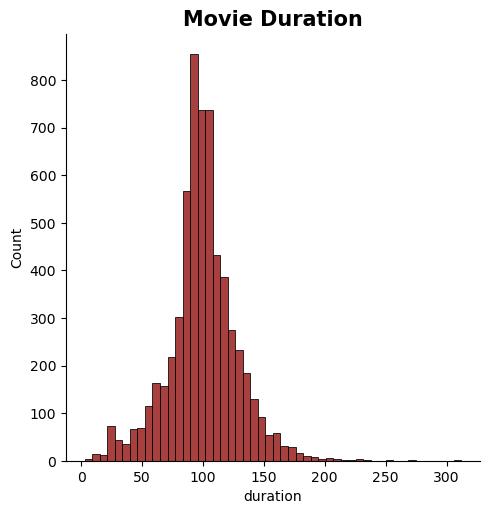

In [764]:
sns.displot(movie['duration'], color='darkred', bins=50)
plt.title('Movie Duration', fonts)

* The average movie duration is 100 minuts

In [765]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,No information,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No information,No information,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No information,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


In [766]:
tv_show['duration'].value_counts()

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64

In [768]:
#Delete the word Season and change the name of the column from "duration" to "seasons"
tv_show['duration']=tv_show['duration'].str.split(' ').str[0]
tv_show.rename(columns={'duration':'seasons'}, inplace=True)

C:\Users\analm\AppData\Local\Temp\ipykernel_30348\3755346375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['duration']=tv_show['duration'].str.split(' ').str[0]
C:\Users\analm\AppData\Local\Temp\ipykernel_30348\3755346375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show.rename(columns={'duration':'seasons'}, inplace=True)


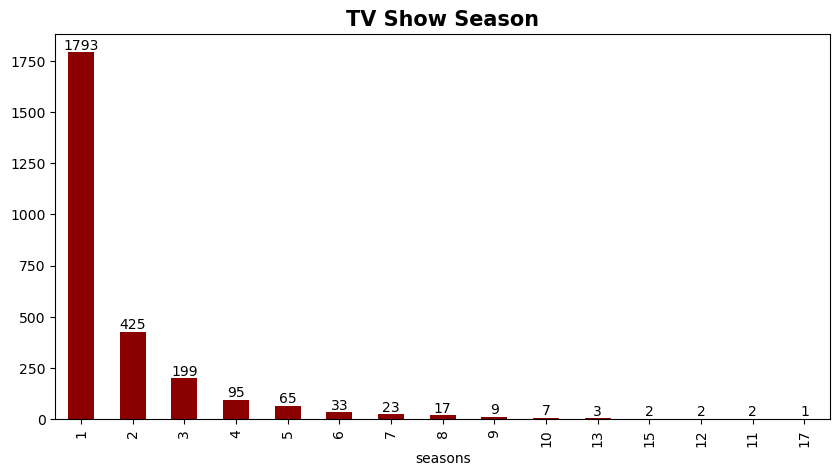

In [777]:
fig = plt.figure(figsize=(10,5))
tv_show['seasons'].value_counts().plot(kind='bar', color='darkred')

for i in enumerate(tv_show['seasons'].value_counts()):
    plt.text(i[0], i[1], str(i[1]), ha='center', va='bottom')
    
plt.title('TV Show Season', fonts)
plt.show()

In [779]:
tv_show['seasons'].describe()

count     2676
unique      15
top          1
freq      1793
Name: seasons, dtype: object

* In the database, there are 2664 contents described as Tv show
* 1793 of them have only one season.